Работу выполнил: **Строганов Тимофей ПИ23-2В**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

1)
Докажите, что для дискретной случайной величины X, распределенной по закону Пуассона с параметром λ, математическое ожидание  MX=λ.

Закон Пуассона:
P (x) = ( λ ^ m / m! * (e^λ) )
где λ - n * p ( количество испытаний на вероятность события )

Мат. ожидание дискретной случайной величины = сумма произведений вероятностей на результат.
При вероятностях стремящихся -> 0

2) На викторине задаются 3 вопроса. Вероятность правильно ответить на первый – 0,7, на второй – 0,5, на третий – 0,2. После неправильного ответа игрок выбывает из игры. Найти распределение числа заданных вопросов.

In [ ]:
df = pd.DataFrame({1: [0.7], 2 : [0.5], 3 : [0.2]}, index = ['Ver', 'Rasp'], dtype = np.float64)
print(df.loc[['Ver']], '\n')

df[1]['Rasp'] = 1.0 - df[1]['Ver']
df[1]['Rasp'] = np.round(df[1]['Rasp'], 2)
print(f"Если задали только 1 вопрос 1 - {df[1]['Ver']} =", df[1]['Rasp'])

df[2]['Rasp'] = df[1]['Ver'] * (1 - df[2]['Ver'])
print(f'на 1-й ответил верно, на 2-й неверно: {df[1]["Ver"]} * (1 - {df[2]["Ver"]}) =', df[2]['Rasp'])

df[3]['Rasp'] = df[2]['Rasp']
print(f'Не важно, как правильно ли ответили на 3-й вопрос =', df[3]['Rasp'])

print()
df

       1    2    3
Ver  0.7  0.5  0.2 

Если задали только 1 вопрос 1 - 0.7 = 0.3
на 1-й ответил верно, на 2-й неверно: 0.7 * (1 - 0.5) = 0.35
Не важно, как правильно ли ответили на 3-й вопрос = 0.35



,1,2,3
Ver,0.7,0.50,0.20
Rasp,0.3,0.35,0.35


4) В игровом автомате три окошка, в которых случайным образом появляется цифры от 0 до 9, равновероятно и независимо друг от друга. Если 2 цифры совпали, игрок получает 10 руб., если все три – 100 руб. Чтобы начать игру, он платит 5 руб. Найти распределение выигрыша и его математическое ожидание.

In [ ]:
df = pd.DataFrame({'lose' : [-5, 0], '2 sovp': [5, 0], '3 sovp' : [95, 0]} , index = ["award", 'dist'], dtype = np.float64)
print( df.loc[['award']] , '\n' )

all_poss = 10 * 10 * 10
print('Все варианты, 10^3 =', all_poss)

df['lose']['dist'] = 10 * 9 * 8 / all_poss
print('В первой колонке любая цифра, во второй 9, в третьей 8, 10 * 9 * 8 =', df['lose']['dist'])

df['3 sovp']['dist'] = 10 * 1 * 1 / all_poss
print('Всего может быть 10 совпадений сразу 3-х цифр:', df['3 sovp']['dist'])

df['2 sovp']['dist'] = (all_poss - df['lose']['dist'] * all_poss - df['3 sovp']['dist'] * all_poss) / all_poss
print('2 совпадения итого: ', df['2 sovp']['dist'])

print( df , '\n' )
print(f'Посчитаем мат. ожидание: ')

mathexp = 0.0
for i in df.columns:
  print(f"({df[i]['dist']} * {df[i]['award']}) ", end = '+ ')
  mathexp += df[i]['dist'] * df[i]['award']

print('\n')
print('Матожидание:', np.round(mathexp, 2))


       lose  2 sovp  3 sovp
award  -5.0     5.0    95.0 

Все варианты, 10^3 = 1000
В первой колонке любая цифра, во второй 9, в третьей 8, 10 * 9 * 8 = 0.72
Всего может быть 10 совпадений сразу 3-х цифр: 0.01
2 совпадения итого:  0.27
       lose  2 sovp  3 sovp
award -5.00    5.00   95.00
dist   0.72    0.27    0.01 

Посчитаем мат. ожидание: 
(0.72 * -5.0) + (0.27 * 5.0) + (0.01 * 95.0) + 

Матожидание: -1.3


5) На станцию обслуживания поступают заявки в соответствии с распределением Пуассона с параметром λ=2 (в единицу времени). Мощность станции позволяет обслуживать не более 2-х заявок в единицу времени. Найти вероятность того, что в течение данной единицы времени: а) станция не справится с потоком заказов и образуется очередь; б) станция обслуживания будет простаивать или работать не на полную мощность; в) на станции обслуживания не образуется очередь. Решить задачу без учета заявок, возможно, оставшихся с прошлой единицы времени.

In [ ]:
puas = lambda  a = 2, m = 0 : (a ** m) / (np.math.factorial(m) * np.exp(a))

s = np.random.poisson(2, 3)
# a) m >= 3
# 0 + 1 + 2
# => we need to count for zero, one and two, result is: 1 - this value
val = puas(2, 0)
val += puas(2, 1)
val += puas(2, 2)
val = 1 - val
val1 = np.round(val, 3)
print('a)', val1)

# b) 0 <= m <= 1
val = puas(2, 0)
val += puas(2, 1)
val2 = np.round(val, 3)
print('b)', val2)

# c) 0 <= m <= 2
val = puas(2, 0)
val += puas(2, 1)
val += puas(2, 2)
val3 = np.round(val, 3)
print('c)', val3)

a) 0.323
b) 0.406
c) 0.677


6) Закон распределения случайной величины имеет вид:

In [ ]:
df = pd.DataFrame({'p' : [1/8, 3/8, 3/8, None, ''], 'F' : ['-i - 0', '0 - 1', '1 - 2', '2 - 3', '3 - +i'], 'Fx': np.zeros(5)}).transpose()
df.loc[['p']]

,0,1,2,3,4
p,0.125,0.375,0.375,None,


Найти функцию распределения случайной величины X, вычислить ее математическое ожидание, дисперсию и ско. Вычислить вероятность P{-1<X<3/2}.

In [ ]:
df[3]['p'] = 1 - df[2]['p'] - df[1]['p'] - df[0]['p']
print(df.loc[['p']])

# Функция распределения
df[0]['Fx'] = 0
df[1]['Fx'] = df[0]['p']
df[2]['Fx'] = df[0]['p'] + df[1]['p']
df[3]['Fx'] = df[0]['p'] + df[1]['p'] + df[2]['p']
df[4]['Fx'] = df[0]['p'] + df[1]['p'] + df[2]['p'] + df[3]['p']
df


       0      1      2      3 4
p  0.125  0.375  0.375  0.125  


,0,1,2,3,4
p,0.125,0.375,0.375,0.125,
F,-i - 0,0 - 1,1 - 2,2 - 3,3 - +i
Fx,0,0.125,0.5,0.875,1.0


In [ ]:
# мат. ожидание
mathexp = df[0]['p'] * 0
mathexp += df[1]['p'] * 1
mathexp += df[2]['p'] * 2
mathexp += df[3]['p'] * 3

print('Мат. ожидание M(x) =', mathexp)

Мат. ожидание M(x) = 1.5


In [ ]:
# дисперсия:

sqr = 0**2 * df[0]['p']
sqr += 1**2 * df[1]['p']
sqr += 2**2 * df[2]['p']
sqr += 3**2 * df[3]['p']
print('M(x^2) =', sqr) # сумма квадратов на вероятность

mathsqr = mathexp ** 2
print('M(x) ^ 2 =', mathsqr) # квадрат мат. ожидания

disp = sqr - mathsqr
print('Дисперсия = M(x^2) - M(x)^2 =', disp)

M(x^2) = 3.0
M(x) ^ 2 = 2.25
Дисперсия = M(x^2) - M(x)^2 = 0.75


In [ ]:
# СКО
sko = ( 0 - mathexp ) ** 2 * df[0]['p']
sko += ( 1 - mathexp ) ** 2 * df[1]['p']
sko += ( 2 - mathexp ) ** 2 * df[2]['p']
sko += ( 3 - mathexp ) ** 2 * df[3]['p']
sko **= 0.5
#sko = disp ** 0.5

print('СКО: ', sko)

СКО:  0.8660254037844386


In [ ]:
df

,0,1,2,3,4
p,0.125,0.375,0.375,0.125,
F,-i - 0,0 - 1,1 - 2,2 - 3,3 - +i
Fx,0,0.125,0.5,0.875,1.0


In [ ]:
# вероятность для [-1, 1.5]
ver = df[0]['p'] + df[1]['p'] + df[2]['p']
print(ver * 100, '%')

87.5 %


7) Дискретная двумерная случайная величина задана в таблице:

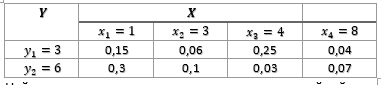

Найти условное математическое ожидание случайной величины 𝑌 при 𝑋=𝑥1=1.

In [ ]:
df = pd.DataFrame({1: [0.15, 0.3], 3 : [0.06, 0.1], 4 : [0.25, 0.03], 8 : [0.04, 0.07]}, index = [3, 6])
df

,1,3,4,8
3,0.15,0.06,0.25,0.04
6,0.30,0.10,0.03,0.07


In [ ]:
# матожидание равно:
# 0.15 + 0.3 = 0.45
# 3 * p(y1 | x1) + 6 * p(y2 | x1)
sum = np.round(df[1].sum(), 2)
a = df[1][3] / sum
b = df[1][6] / sum
print(a, b)
mathexp = df.index[0] * a + df.index[1] * b
print('Условное матожидание:', mathexp)

0.3333333333333333 0.6666666666666666
Условное матожидание: 5.0


8) Задано распределение пары случайных величин:

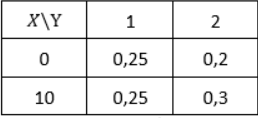

Найти: E(X│Y), E(X^2│Y), D(X│Y)

Создаём таблицу:


In [ ]:
df = pd.DataFrame({'Y1' : [0.25, 0.25], 'Y2': [0.2, 0.3]}, index = [0, 10])
df

,Y1,Y2
0,0.25,0.2
10,0.25,0.3


Трансформируем таблицу для операции groupby:

In [ ]:
df = pd.DataFrame({'Y1' : [0.25, 0.25], 'Y2': [0.2, 0.3]}, index = [0, 10])
long_df = df.reset_index().melt(id_vars='index', var_name='Y', value_name='P(Y,X)')
long_df.rename(columns={'index': 'X'}, inplace=True)
long_df['Y'] = long_df['Y'].str.extract('(\d+)').astype(int)
df = long_df
print(long_df)

    X  Y  P(Y,X)
0   0  1    0.25
1  10  1    0.25
2   0  2    0.20
3  10  2    0.30


Считаем суммы вероятностей по Y

In [ ]:
df['P(Y)'] = df.groupby('Y')['P(Y,X)'].transform('sum')
df

,X,Y,"P(Y,X)",P(Y)
0,0,1,0.25,0.5
1,10,1,0.25,0.5
2,0,2,0.20,0.5
3,10,2,0.30,0.5


Считаем условные вероятности P(X|Y), вероятность / сумму вероятностей

In [ ]:
df['P(X|Y)'] = df['P(Y,X)'] / df['P(Y)']
df

,X,Y,"P(Y,X)",P(Y),P(X|Y)
0,0,1,0.25,0.5,0.5
1,10,1,0.25,0.5,0.5
2,0,2,0.20,0.5,0.4
3,10,2,0.30,0.5,0.6


Считаем условнон математическое ожидание Е(X|Y)

In [ ]:
E_X_Y = df.groupby('Y').apply(lambda g: (g['X'] * g['P(X|Y)']).sum())

Условное матожидание квадратов

In [ ]:
E_X2_Y = df.groupby('Y').apply(lambda g: (g['X']**2 * g['P(X|Y)']).sum())

Условная дисперсия:

In [ ]:
D_X_Y = E_X2__Y - E_X__Y**2

Ответы :

In [ ]:
print("E(X|Y):")
print(E_X_Y)
print("\nE(X^2|Y):")
print(E_X2_Y)
print("\nD(X|Y):")
print(D_X_Y)

E(X|Y):
Y
1    5.0
2    6.0
dtype: float64

E(X^2|Y):
Y
1    50.0
2    60.0
dtype: float64

D(X|Y):
Y
1    25.0
2    24.0
dtype: float64


9)
1.	Найти закон распределения случайной величины Y
2.	Найти закон распределения случайной величины X
3.	Найти условный закон распределения случайной величины X при условии, что Y=y2=5

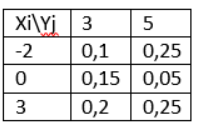

In [ ]:
data = pd.DataFrame({
    -2: [0.1, 0.25],
    0: [0.15, 0.05],
    3: [0.2, 0.25],
    },
    index = [3, 5]).transpose()

In [ ]:
df = data._append(data.sum().rename('P(Y)'))
df['P(X)'] = df[[3, 5]].sum(axis = 1).drop(index = ['P(Y)']).rename('P(X)')
df['P(X)']['P(Y)'] = '1'
df

,3,5,P(X)
-2,0.10,0.25,0.35
0,0.15,0.05,0.2
3,0.20,0.25,0.45
P(Y),0.45,0.55,1


In [ ]:
df['P(X,Y=5)'] = df[5].drop(index = ['P(Y)']) / df[5]['P(Y)']
df

,3,5,P(X),"P(X,Y=5)"
-2,0.10,0.25,0.35,0.454545
0,0.15,0.05,0.2,0.090909
3,0.20,0.25,0.45,0.454545
P(Y),0.45,0.55,1,NaN


9) Совместный закон распределения пары случайных величин задан таблицей

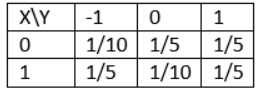



Найти распределение вероятностей случайной величины X-Y и вычислить cov(X+Y,X-Y). Исследовать вопрос о зависимости случайных величин X и Y.

In [ ]:
Y = [-1, 0, 1]
X = [0, 1]
data = pd.DataFrame({
    X[0]: [1/10, 1/5, 1/5],
    X[1]: [1/5, 1/10, 1/5]
}, index = Y).transpose()
data

,-1,0,1
0,0.1,0.2,0.2
1,0.2,0.1,0.2


In [ ]:
diff = {i-j: 0 for i in X for j in Y}
for x in X:
  for y in Y:
    diff[x-y] += data[y][x]
diff = pd.DataFrame(diff, index = ['X-Y'])
diff

,1,0,-1,2
X-Y,0.2,0.4,0.2,0.2


In [ ]:
#E(X+Y):
Expy = np.sum((x+y) * data[y][x]
           for x in X for y in Y)
Expy = np.round(Expy, 2)
#E(X-Y)
Exmy = np.sum((x-y) * data[y][x]
               for x in X for y in Y)
print('E(X+Y) =', Expy, ' E(X-Y) =', Exmy)

E(X+Y) = 0.6  E(X-Y) = 0.4


In [ ]:
Expy_xmy = np.round(
    np.sum( (x+y) * (x-y) * data[y][x]
    for x in X for y in Y
), 2)
print('E((X+Y)(X-Y)) =',Expy_xmy)

E((X+Y)(X-Y)) = -0.2


In [ ]:
# ковариация cov(X+Y, X-Y) = E((X+Y)(X-Y)) - E(X+Y) * E(X-Y)

covE = Expy_xmy - Expy * Exmy
print(f'Распределение P(X-Y) = \n{diff}\n'
      f'cov(X+Y,X-Y) = {covE}, не равно 0 => величины зависимы = {covE != 0}\n')

Распределение P(X-Y) = 
       1    0   -1    2
X-Y  0.2  0.4  0.2  0.2
cov(X+Y,X-Y) = -0.44, не равно 0 => величины зависимы = True

